# <center>利用Markov Chain算法计算圆面积，寻找使计算误差最小的最优最大步幅，并与均匀采样法比较效率
<center>林宇宸 19720182203933
<center>2019.12

## 1.背景简介

马尔可夫链蒙特卡洛（英语：Markov chain Monte Carlo，MCMC）方法（含随机游走蒙特卡洛方法）是一组用马氏链从随机分布取样的算法，之前步骤的作为底本。步数越多，结果越好。

创建一个具有期望属性的马氏链并非难事，难的是如何决定通过多少步可以达到在许可误差内的稳定分布。一个好的马氏链具有快速混合——从开始阶段迅速获得的一个稳定状态——请参考马氏链最大时间。

因于初始样本，最常见的MCMC取样只能近似得到分布。复杂的MCMC改进算法如过往耦合，但是会消耗更多的计算资源和时间。

典型用法是模拟一个随机行走的行人来进行路径优化等。每一步都算作是一个状态。而统计经过次数最多的地方将在下一步中更有可能为目的地。马氏蒙特卡洛方法是一种结合了蒙特卡罗法的解决方案。但不同于以往的蒙特卡洛integration是统计独立的，MCMC中的是统计相关的。

## 2.研究方法

本文利用采用MCMC算法来计算圆的面积。

在寻找最优最大步幅时。本文画出了相对误差与步幅的关系图，通过图表可以直观了解使得误差最小的最优最大步幅。

与均匀采样法比较效率，分别就精度和运行时间分别比较效率。

## 3.利用均匀取样方法计算圆的面积

蒙卡结果： 0.7798 
 理论结果： 0.7853981633974483


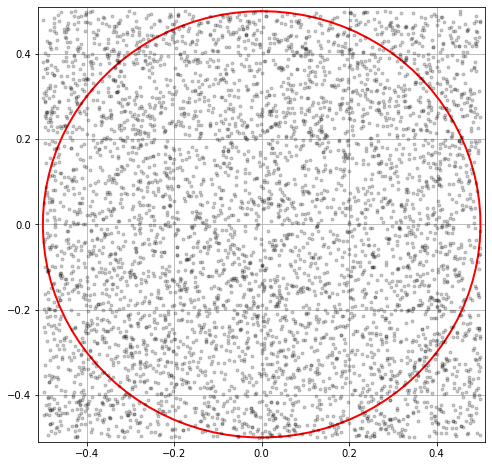

In [21]:
t=np.linspace(0,2*3.1415926,100)
X=np.sin(t)*0.5
Y=np.cos(t)*0.5
plt.figure(figsize=(8,8))
plt.grid(True)
plt.ylim(-0.51,0.51)
plt.xlim(-0.51,0.51)
plt.plot(X,Y,'r-',lw=2)
N=5000
np.random.seed()
X_random=np.random.uniform(-0.5,0.5,N)
Y_random=np.random.uniform(-0.5,0.5,N)
plt.plot(X_random, Y_random,'k.',alpha=0.2)

N_hit=0
for i in np.arange(N):
    if np.sqrt((X_random[i]*X_random[i]+Y_random[i]*Y_random[i]))<0.5:
        N_hit=N_hit+1
print("蒙卡结果：",N_hit/N,"\n","理论结果：",np.pi*0.5*0.5)

## 4.利用MCMC算法计算圆的面积 
 - 假设此时最大步幅为0.2

### 运行结果如下

蒙卡结果： 0.7674 
理论结果： 0.7853981633974483
Wall time: 1.14 s


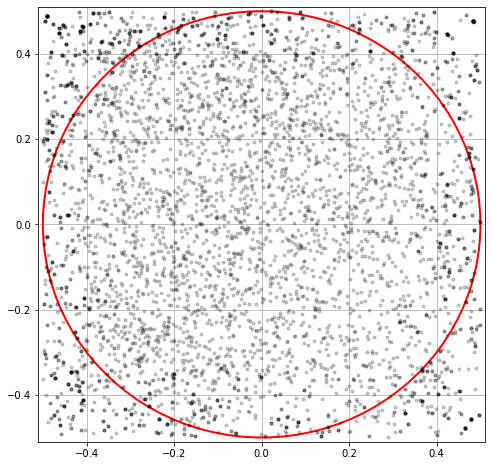

In [10]:
%%time
import time
for i in range(10):
    time.sleep(0.1)

import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy import stats
%matplotlib inline
x,y=0,0
delta=0.2 #最大步幅
n_trials=5000
Pos=np.zeros((n_trials,2))
n_hits=0
for i in np.arange(n_trials):
    del_x,del_y=np.random.uniform(-delta,delta,),np.random.uniform(-delta,delta,)
    if np.abs(x+del_x)<0.5 and np.abs(y+del_y)<0.5:
        x,y=x+del_x,y+del_y
    if x**2+y**2<0.5*0.5:
        n_hits+=1
    Pos[i,0]=x
    Pos[i,1]=y
t=np.linspace(0,2*3.1415926,100)
X=np.sin(t)*0.5
Y=np.cos(t)*0.5
plt.figure(figsize=(8,8))
plt.grid(True)
plt.ylim(-0.51,0.51)
plt.xlim(-0.51,0.51)
plt.plot(X,Y,'r-',lw=2)

plt.plot(Pos[:,0],Pos[:,1],"k.",alpha=0.2)
print("蒙卡结果：",n_hits/n_trials,"\n理论结果：",np.pi*0.5*0.5)

## 5.我们探究最大步幅与误差之间的关系，并做图

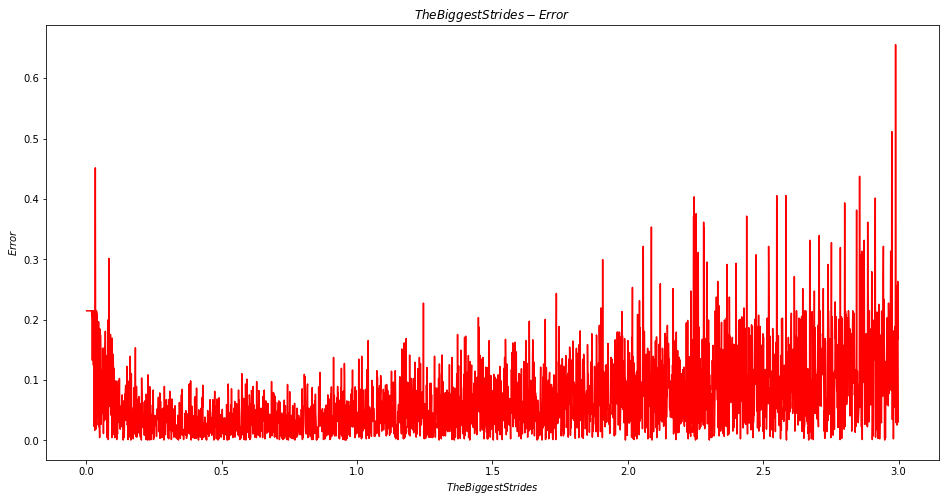

In [12]:
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy import stats
%matplotlib inline
bestcircle=[]
plt.figure(figsize=(16, 8))
a=[]
for i in range(1,3000,1):
    a.append(i*0.001)
for k in range(1,3000,1):
    delta=k*0.001
    x,y=0,0
    n_trials=500
    n_hits=0
    for i in np.arange(n_trials):
        del_x,del_y=np.random.uniform(-delta,delta,),np.random.uniform(-delta,delta,)
        if np.abs(x+del_x)<0.5 and np.abs(y+del_y)<0.5:
            x,y=x+del_x,y+del_y
        if x**2+y**2<0.5*0.5:
            n_hits+=1
    bestcircle.append(np.abs((n_hits/n_trials)-np.pi*0.5*0.5))
plt.xlabel("$The Biggest Strides$")
plt.ylabel("$Error$")
plt.title("$The Biggest Strides-Error$")
plt.plot(a,bestcircle,'r')


由图表我们可以发现最大步幅对应的误差在步幅为0.0-0.8的区间减小,在大于步幅0.8的区间误差逐渐增大

#### 接下来我们放大该图表0.0-1.2的部分

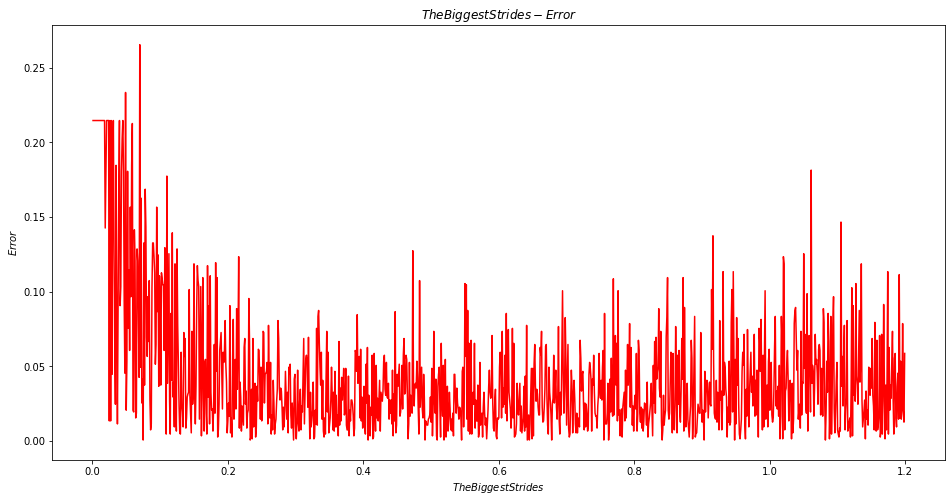

In [14]:
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy import stats
%matplotlib inline
bestcircle=[]
plt.figure(figsize=(16, 8))
a=[]
for i in range(1,1200,1):
    a.append(i*0.001)
for k in range(1,1200,1):
    delta=k*0.001
    x,y=0,0
    n_trials=500
    n_hits=0
    for i in np.arange(n_trials):
        del_x,del_y=np.random.uniform(-delta,delta,),np.random.uniform(-delta,delta,)
        if np.abs(x+del_x)<0.5 and np.abs(y+del_y)<0.5:
            x,y=x+del_x,y+del_y
        if x**2+y**2<0.5*0.5:
            n_hits+=1
    bestcircle.append(np.abs((n_hits/n_trials)-np.pi*0.5*0.5))
plt.xlabel("$The Biggest Strides$")
plt.ylabel("$Error$")
plt.title("$The Biggest Strides-Error$")
plt.plot(a,bestcircle,'r')

我们可以发现，在最大步幅为0.2-0.4的附近，误差大的峰值较少，相对误差较小。

#### 接下来，我们放大0.2-0.4区间

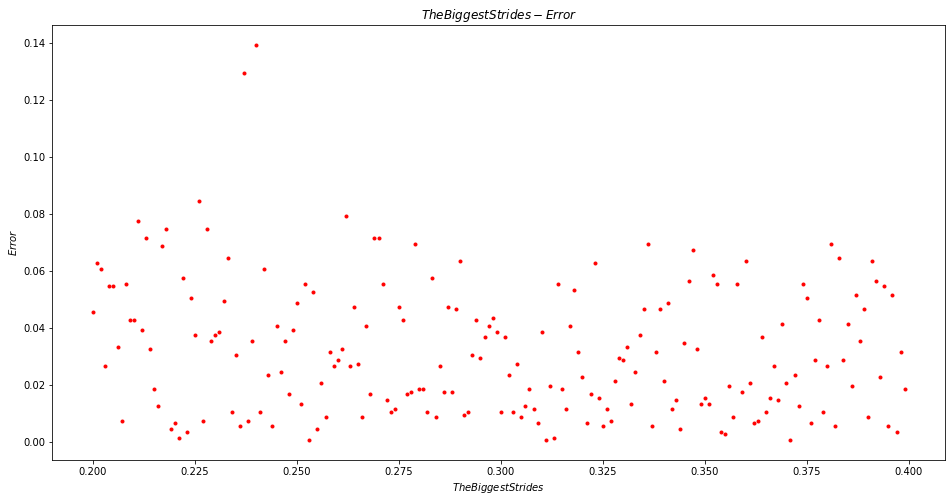

In [18]:
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy import stats
%matplotlib inline
bestcircle=[]
plt.figure(figsize=(16, 8))
a=[]
for i in range(200,400,1):
    a.append(i*0.001)
for k in range(200,400,1):
    delta=k*0.001
    x,y=0,0
    n_trials=500
    n_hits=0
    for i in np.arange(n_trials):
        del_x,del_y=np.random.uniform(-delta,delta,),np.random.uniform(-delta,delta,)
        if np.abs(x+del_x)<0.5 and np.abs(y+del_y)<0.5:
            x,y=x+del_x,y+del_y
        if x**2+y**2<0.5*0.5:
            n_hits+=1
    bestcircle.append(np.abs((n_hits/n_trials)-np.pi*0.5*0.5))
plt.xlabel("$The Biggest Strides$")
plt.ylabel("$Error$")
plt.title("$The Biggest Strides-Error$")
plt.plot(a,bestcircle,'r.')

可见，在0.300-0.330区间，误差小的点较多
#### 接下来，我们放大这一区间

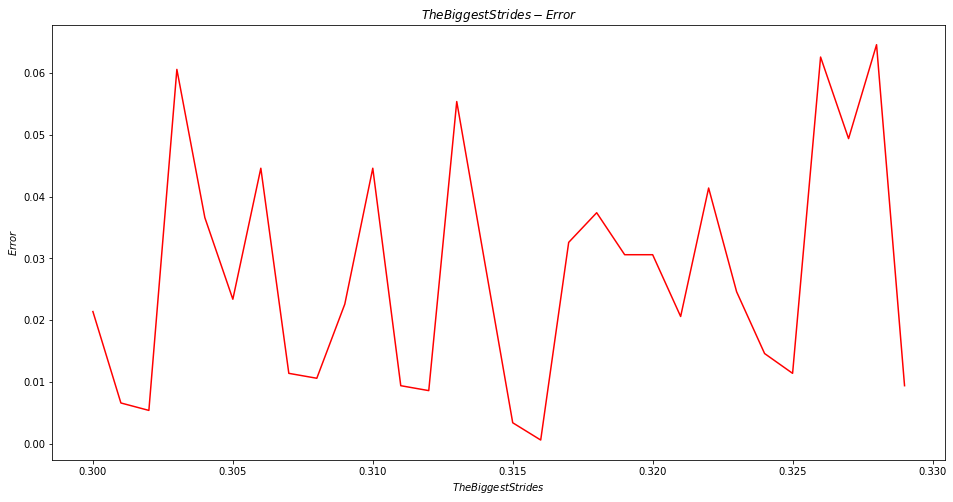

In [21]:
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy import stats
%matplotlib inline
bestcircle=[]
plt.figure(figsize=(16, 8))
a=[]
for i in range(300,330,1):
    a.append(i*0.001)
for k in range(300,330,1):
    delta=k*0.001
    x,y=0,0
    n_trials=500
    n_hits=0
    for i in np.arange(n_trials):
        del_x,del_y=np.random.uniform(-delta,delta,),np.random.uniform(-delta,delta,)
        if np.abs(x+del_x)<0.5 and np.abs(y+del_y)<0.5:
            x,y=x+del_x,y+del_y
        if x**2+y**2<0.5*0.5:
            n_hits+=1
    bestcircle.append(np.abs((n_hits/n_trials)-np.pi*0.5*0.5))
plt.xlabel("$The Biggest Strides$")
plt.ylabel("$Error$")
plt.title("$The Biggest Strides-Error$")
plt.plot(a,bestcircle,'r')

#### 可见，在最大步幅约为0.316时，误差最小，我们取此数值作为最大步幅，并在接下来的分析中，取MCMC算法中的最大步幅为0.316

## 6.效率比较
### 我们先比较相同（取样/行走）次数下，均匀取样和随机行走在运行次数上的效率

Wall time: 3.63 s


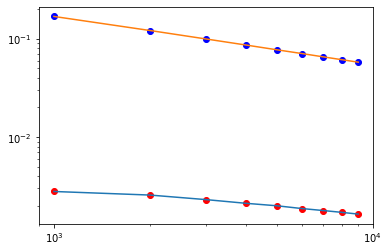

In [37]:
%%time
import time
for i in range(10):
    time.sleep(0.1)
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy import stats
%matplotlib inline
#pi= 3.1415926535#均匀采样
a=[]#储存误差
b=[]#储存N值
c=[]#储存S
d=0
for N in range(1000,10000,1000):
    for i in range(1,50,1):
        x = np.random.uniform(-0.5,0.5,size=N)
        y = np.random.uniform(-0.5,0.5,size=N)
        s=0
        i=0
        for i in range(0,N-1,1):
            if ((x[i]**2+y[i]**2)<0.25):
                s=s+1
        S=s/N
        d+=(np.pi*0.5*0.5-S)**2
    e=np.sqrt(d/N)          
    a.append(e)
    b.append(N)
    o=0
    
a2=[]
b=[]
for N in range(1000,10000,1000):
    x,y=0,0
    delta=0.316 #最大步幅
    n2=0
    d2=0
    for i in range(1,50,1):
        del_x,del_y=np.random.uniform(-delta,delta,),np.random.uniform(-delta,delta,)
        if np.abs(x+del_x)<0.5 and np.abs(y+del_y)<0.5:
            x,y=x+del_x,y+del_y
        if x**2+y**2<0.5*0.5:
            n2+=1
        S2=n2/N
        d2+=(pi*0.5*0.5-S2)**2
    e2=np.sqrt(d2/N)  
    a2.append(e2)
    b.append(N)
plt.loglog(b,a,'ro')
plt.loglog(b,a)
plt.loglog(b,a2,'bo')
plt.loglog(b,a2)

图中红点为均匀采样次数与精度的关系

图中蓝点为随机行走次数与精度的关系

由图显然可见，均匀采样方法相对于MCMC算法，在相同运算次数时，均匀采样方法有更高的精度，


### 下面我们来比较二者的时间效率

#### 均匀采样做5000次的时间

蒙卡结果： 0.7882 
 理论结果： 0.7853981633974483
Wall time: 1.03 s


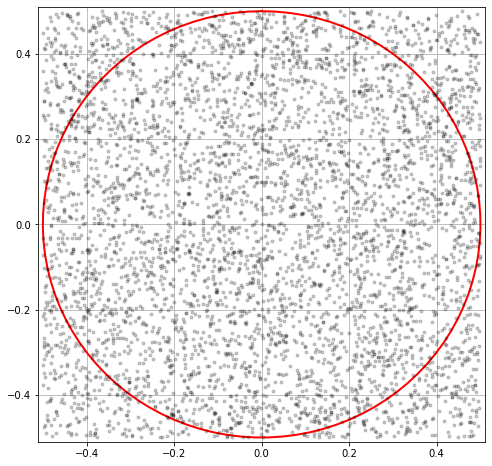

In [24]:
%%time
import time
for i in range(10):
    time.sleep(0.1)
t=np.linspace(0,2*3.1415926,100)
X=np.sin(t)*0.5
Y=np.cos(t)*0.5
plt.figure(figsize=(8,8))
plt.grid(True)
plt.ylim(-0.51,0.51)
plt.xlim(-0.51,0.51)
plt.plot(X,Y,'r-',lw=2)
N=5000
np.random.seed()
X_random=np.random.uniform(-0.5,0.5,N)
Y_random=np.random.uniform(-0.5,0.5,N)
plt.plot(X_random, Y_random,'k.',alpha=0.2)

N_hit=0
for i in np.arange(N):
    if np.sqrt((X_random[i]*X_random[i]+Y_random[i]*Y_random[i]))<0.5:
        N_hit=N_hit+1
print("蒙卡结果：",N_hit/N,"\n","理论结果：",np.pi*0.5*0.5)

#### 均匀采样做50000次的时间

蒙卡结果： 0.78616 
 理论结果： 0.7853981633974483
Wall time: 1.23 s


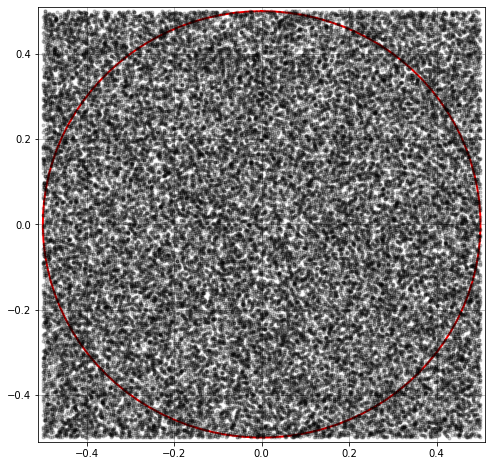

In [23]:
%%time
import time
for i in range(10):
    time.sleep(0.1)
t=np.linspace(0,2*3.1415926,100)
X=np.sin(t)*0.5
Y=np.cos(t)*0.5
plt.figure(figsize=(8,8))
plt.grid(True)
plt.ylim(-0.51,0.51)
plt.xlim(-0.51,0.51)
plt.plot(X,Y,'r-',lw=2)
N=50000
np.random.seed()
X_random=np.random.uniform(-0.5,0.5,N)
Y_random=np.random.uniform(-0.5,0.5,N)
plt.plot(X_random, Y_random,'k.',alpha=0.2)

N_hit=0
for i in np.arange(N):
    if np.sqrt((X_random[i]*X_random[i]+Y_random[i]*Y_random[i]))<0.5:
        N_hit=N_hit+1
print("蒙卡结果：",N_hit/N,"\n","理论结果：",np.pi*0.5*0.5)
        

#### 均匀采样做500000次的时间

蒙卡结果： 0.785064 
 理论结果： 0.7853981633974483
Wall time: 2.22 s


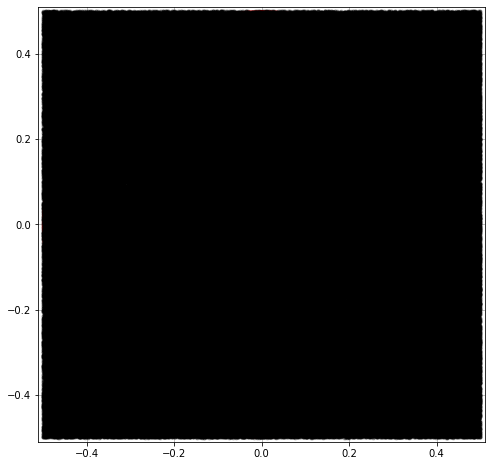

In [25]:
%%time
import time
for i in range(10):
    time.sleep(0.1)
t=np.linspace(0,2*3.1415926,100)
X=np.sin(t)*0.5
Y=np.cos(t)*0.5
plt.figure(figsize=(8,8))
plt.grid(True)
plt.ylim(-0.51,0.51)
plt.xlim(-0.51,0.51)
plt.plot(X,Y,'r-',lw=2)
N=500000
np.random.seed()
X_random=np.random.uniform(-0.5,0.5,N)
Y_random=np.random.uniform(-0.5,0.5,N)
plt.plot(X_random, Y_random,'k.',alpha=0.2)

N_hit=0
for i in np.arange(N):
    if np.sqrt((X_random[i]*X_random[i]+Y_random[i]*Y_random[i]))<0.5:
        N_hit=N_hit+1
print("蒙卡结果：",N_hit/N,"\n","理论结果：",np.pi*0.5*0.5)

#### 随机行走做5000次的时间

蒙卡结果： 0.7846 
理论结果： 0.7853981633974483
Wall time: 1.08 s


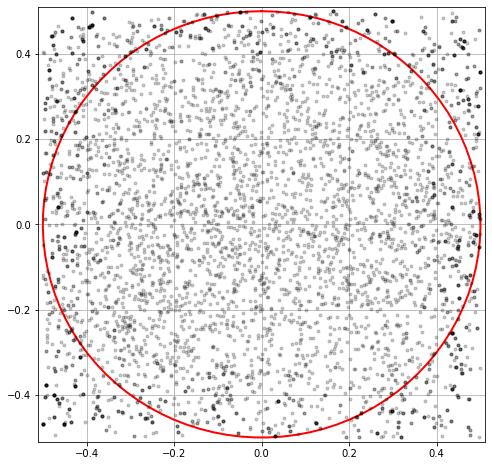

In [32]:
%%time
import time
for i in range(10):
    time.sleep(0.1)

import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy import stats
%matplotlib inline
x,y=0,0
delta=0.2 #最大步幅
n_trials=5000
Pos=np.zeros((n_trials,2))
n_hits=0
for i in np.arange(n_trials):
    del_x,del_y=np.random.uniform(-delta,delta,),np.random.uniform(-delta,delta,)
    if np.abs(x+del_x)<0.5 and np.abs(y+del_y)<0.5:
        x,y=x+del_x,y+del_y
    if x**2+y**2<0.5*0.5:
        n_hits+=1
    Pos[i,0]=x
    Pos[i,1]=y
t=np.linspace(0,2*3.1415926,100)
X=np.sin(t)*0.5
Y=np.cos(t)*0.5
plt.figure(figsize=(8,8))
plt.grid(True)
plt.ylim(-0.51,0.51)
plt.xlim(-0.51,0.51)
plt.plot(X,Y,'r-',lw=2)

plt.plot(Pos[:,0],Pos[:,1],"k.",alpha=0.2)
print("蒙卡结果：",n_hits/n_trials,"\n理论结果：",np.pi*0.5*0.5)

#### 随机行走做50000次的时间

蒙卡结果： 0.78778 
理论结果： 0.7853981633974483
Wall time: 1.33 s


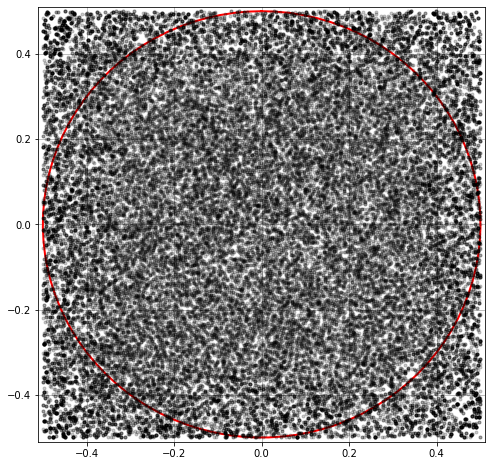

In [33]:
%%time
import time
for i in range(10):
    time.sleep(0.1)

import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy import stats
%matplotlib inline
x,y=0,0
delta=0.2 #最大步幅
n_trials=50000
Pos=np.zeros((n_trials,2))
n_hits=0
for i in np.arange(n_trials):
    del_x,del_y=np.random.uniform(-delta,delta,),np.random.uniform(-delta,delta,)
    if np.abs(x+del_x)<0.5 and np.abs(y+del_y)<0.5:
        x,y=x+del_x,y+del_y
    if x**2+y**2<0.5*0.5:
        n_hits+=1
    Pos[i,0]=x
    Pos[i,1]=y
t=np.linspace(0,2*3.1415926,100)
X=np.sin(t)*0.5
Y=np.cos(t)*0.5
plt.figure(figsize=(8,8))
plt.grid(True)
plt.ylim(-0.51,0.51)
plt.xlim(-0.51,0.51)
plt.plot(X,Y,'r-',lw=2)

plt.plot(Pos[:,0],Pos[:,1],"k.",alpha=0.2)
print("蒙卡结果：",n_hits/n_trials,"\n理论结果：",np.pi*0.5*0.5)

#### 随机行走做500000次的时间

蒙卡结果： 0.7864 
理论结果： 0.7853981633974483
Wall time: 3.27 s


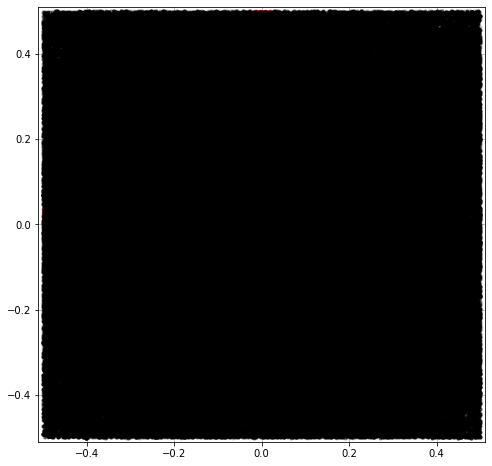

In [34]:
%%time
import time
for i in range(10):
    time.sleep(0.1)

import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy import stats
%matplotlib inline
x,y=0,0
delta=0.2 #最大步幅
n_trials=500000
Pos=np.zeros((n_trials,2))
n_hits=0
for i in np.arange(n_trials):
    del_x,del_y=np.random.uniform(-delta,delta,),np.random.uniform(-delta,delta,)
    if np.abs(x+del_x)<0.5 and np.abs(y+del_y)<0.5:
        x,y=x+del_x,y+del_y
    if x**2+y**2<0.5*0.5:
        n_hits+=1
    Pos[i,0]=x
    Pos[i,1]=y
t=np.linspace(0,2*3.1415926,100)
X=np.sin(t)*0.5
Y=np.cos(t)*0.5
plt.figure(figsize=(8,8))
plt.grid(True)
plt.ylim(-0.51,0.51)
plt.xlim(-0.51,0.51)
plt.plot(X,Y,'r-',lw=2)

plt.plot(Pos[:,0],Pos[:,1],"k.",alpha=0.2)
print("蒙卡结果：",n_hits/n_trials,"\n理论结果：",np.pi*0.5*0.5)

通过对比以上结果可见，当(取样/行走）次数为5000，50000，500000次时

1. 均匀采样消耗的时间为1.03s,1.23s,2.22s

2. 随机行走消耗的时间为1.08s,1.33s,3.27s

可见在时间效率上，均匀采样方法也较MCMC方法有优势

## 7.结论

本文探索了:

1. 先利用Markov Chain算法计算圆面积。

2. 通过计算最大步幅和对应的相对误差，得到最大步幅-相对误差图，从图中得出最优步幅区间。相对误差随最大步幅呈现先减小后增大的趋势，选取图中相对误差较小较稳定的一段中的值作为后续研究的最大步幅。

3. 和均匀取样法的效率比较，本文分别比较了运算次数效率和时间效率。通过计算得出，在相同运算次数的情形下，均匀取样法有更精确的值，且有更快的速度。

#### 因此，本文认为，相较于MCMC算法，均匀取样法更有优势。

## 8.参考文献

1、https://blog.csdn.net/google19890102/article/details/51755242

2、https://zh.wikipedia.org/zh-hans/%E9%A9%AC%E5%B0%94%E5%8F%AF%E5%A4%AB%E9%93%BE%E8%92%99%E7%89%B9%E5%8D%A1%E6%B4%9B

3、https://www.jiqizhixin.com/articles/2017-12-24-6
